# MATH 210 Introduction to Mathematical Computing

## February 15, 2017

1. Number Theory
2. Sequences
3. Series
4. Solving equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Number Theory

Let's plot the function $\pi(x)$ where $\pi(x)$ is the number of primes less than $x$.

In [2]:
def is_prime(N):
    if N < 2:
        return False
    else:
        for d in range(2,int(N**0.5) + 1):
            if N % d == 0:
                return False
        return True

In [3]:
is_prime(13)

True

In [4]:
def pi(x):
    # Create an array of 0 and 1 where Nth entry is 1 if N is prime and 0 otherwise
    primes = []
    for n in range(0,x+1):
        if is_prime(n):
            primes.append(1)
        else:
            primes.append(0)
    # Convert list into a NumPy array
    primes = np.array(primes)
    return primes.cumsum()

In [5]:
pi(10)

array([0, 0, 1, 2, 2, 3, 3, 4, 4, 4, 4])

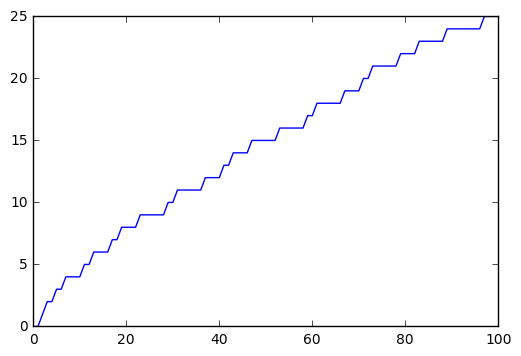

In [6]:
plt.plot(pi(100))

## 2. Sequences

Let's write a function called `e_sequence` which takes 1 input parameter $N$ and returns the sequence $x_1,\dots,x_N$ (as a Python list of length $N$) where

$$
x_n = \left( 1 + \frac{1}{n} \right)^n
$$

In [7]:
def e_sequence(N):
    return [(1 + 1/n)**n for n in range(1,N+1)]

In [8]:
e_sequence(10)

[2.0,
 2.25,
 2.37037037037037,
 2.44140625,
 2.4883199999999994,
 2.5216263717421135,
 2.546499697040712,
 2.565784513950348,
 2.5811747917131984,
 2.5937424601000023]

In [9]:
def e_sequence2(N):
    e_seq = []
    for n in range(1,N+1):
        xn = (1+1/n)**n
        e_seq.append(xn)
    return e_seq

In [10]:
e_sequence2(10)

[2.0,
 2.25,
 2.37037037037037,
 2.44140625,
 2.4883199999999994,
 2.5216263717421135,
 2.546499697040712,
 2.565784513950348,
 2.5811747917131984,
 2.5937424601000023]

In [11]:
e_sequence(100000)[-1]

2.7182682371922975

In [12]:
np.exp(1)

2.7182818284590451

## 3. Series

Let's write a function called `cosine_series` which takes 2 input parameters $x$ and $N$ and computes the series

$$
\sum_{k=1}^N \frac{\cos(kx)}{k^2}
$$

Use it to verify the formula

$$
\sum_{k=1}^{\infty} \frac{\cos(kx)}{k^2} = \frac{\pi^2}{6} - \frac{\pi x}{2} + \frac{x^2}{4}  \ , \ \ x \in [0,2\pi]
$$

In [13]:
def cosine_series(x,N):
    k = np.arange(1,N+1)
    return np.sum(np.cos(k*x)/k**2)

In [14]:
cosine_series(1,100)

0.32413266760475001

In [15]:
# Plug in x=1 into the formula
np.pi**2/6 - np.pi/2 + 1/4

0.32413774005332985

In [16]:
def cosine_series2(x,N):
    return sum([np.cos(k*x)/k**2 for k in range(1,N+1)])

In [17]:
%%timeit
cosine_series(1,10000)

1000 loops, best of 3: 459 µs per loop


In [18]:
%%timeit
cosine_series2(1,10000)

100 loops, best of 3: 17.1 ms per loop


In [19]:
def cosine_series3(x,N):
    result = 0
    for k in range(1,N+1):
        result = result + np.cos(k*x)/k**2
    return result

In [20]:
cosine_series3(1,100)

0.32413266760474985

In [21]:
%%timeit
cosine_series3(1,10000)

100 loops, best of 3: 17.1 ms per loop


## 4. Solving equations

Write a function called `pells_equation` which takes 2 input parameters `n` and `x_range` (Python list of length 2) and returns the list of integer solutions (as a Python list of lists of length 2) to Pell's equation $x^2 - ny^2 = 1$ with $x$ in the interval $[a,b]$ defined by `x_range`.

In [22]:
def is_square(x):
    if x < 0:
        return False
    else:
        return round(x**0.5)**2 == x

In [23]:
is_square(16)

True

In [24]:
def pells_equation(n,x_range):
    a = x_range[0]
    b = x_range[1]
    solutions = []
    for x in range(a,b+1):
        y_squared = (x**2 - 1)/n
        if is_square(y_squared):
            y = round(y_squared**0.5)
            solutions.append([x,y])
    return solutions

In [25]:
pells_equation(5,[0,1000])

[[1, 0], [9, 4], [161, 72]]

In [26]:
9**2 - 5*4**2

1